In [19]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from os import makedirs
from os.path import join, exists, expanduser
from keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [2]:
import sister
sentence_embedding = sister.MeanEmbedding(lang="en")

text = "Egyptian Maus are a small to medium-sized short-haired cat breed. They are one of the few naturally spotted breeds of domesticated cat. The spots of the Mau occur on only the tips of the hairs of its coat. It is considered a rare breed."
text_vec = sentence_embedding(text)

Loading model...


In [12]:
text_vec.shape

(300,)

In [3]:
text_vec

array([ 1.79887012e-01, -1.02492809e-01,  7.40291253e-02, -2.31276378e-01,
        3.88095565e-02,  1.15986764e-01, -1.17757797e-01,  4.01230305e-02,
        9.44677368e-02, -1.43719744e-03,  6.10320307e-02,  2.22019330e-02,
       -6.47510067e-02,  1.89547837e-01, -6.51545972e-02, -3.55733186e-02,
       -1.10235758e-01,  7.67698884e-02, -1.00706100e-01, -6.32476285e-02,
        1.82972118e-01,  1.27985254e-01, -7.30042830e-02, -5.66412322e-02,
       -1.36788681e-01, -1.56954244e-01,  1.65094957e-01, -1.90861747e-01,
       -4.82772589e-02,  1.01583354e-01,  6.30656183e-02,  4.35428135e-02,
       -5.90391755e-02,  1.71671376e-01, -1.05775654e-01, -8.69729295e-02,
       -5.29055409e-02, -1.08645499e-01, -1.32363603e-01,  8.49700794e-02,
        1.07914570e-03, -1.59233660e-01,  1.19473226e-01, -1.07017882e-01,
        1.19605623e-01,  1.10961171e-02, -4.25621402e-04,  6.00867486e-03,
        1.26168653e-01,  7.49252141e-02,  9.25329980e-03, -1.47362754e-01,
       -9.97290686e-02, -

In [4]:
resnet = ResNet50(weights='imagenet')

In [5]:
img_path = '000aa552a9d80891.jpg'

240.0 3.0
136.061 -105.68


[[('n02124075', 'Egyptian_cat', 0.44485942),
  ('n02123045', 'tabby', 0.3139696),
  ('n02123159', 'tiger_cat', 0.23601128),
  ('n02127052', 'lynx', 0.001979413),
  ('n04589890', 'window_screen', 0.0006123421)]]

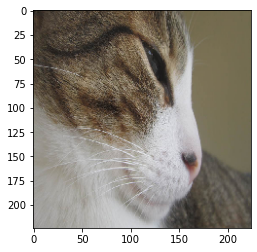

In [6]:
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
print(img.max(),img.min())
plt.imshow(img / 255.)
x = preprocess_input(np.expand_dims(img.copy(), axis=0))
print(x.max(),x.min())
preds = resnet.predict(x)
decode_predictions(preds, top=5)

In [7]:
model = ResNet50(weights='imagenet')
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [8]:
img_vec = model.predict(x)
print(img_vec.shape)

(1, 2048)


In [9]:
img_vec

array([[0.06411111, 0.02583927, 0.5268603 , ..., 1.3382725 , 0.05365842,
        0.        ]], dtype=float32)

In [22]:
from tensorflow.keras import layers

text_input = keras.Input(shape=(None,), name="text")
img_input = keras.Input(shape=(None,), name="img")

#embed into 64-dimentional
text_features = layers.Embedding(300, 64)(text_input)
img_features = layers.Embedding(2048, 64)(img_input)

x = layers.concatenate([text_features, img_features])

In [23]:
x

<KerasTensor: shape=(None, None, 128) dtype=float32 (created by layer 'concatenate_1')>